In [6]:
import torch
from torch import nn
from d2l import torch as d2l

In [7]:
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding), nn.ReLU(),
#         nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU()
    )

In [17]:
net = nn.Sequential(
        nin_block(1, 96, kernel_size=11, stride=4, padding=0),
        nn.MaxPool2d(3, stride=2),
        nin_block(96, 256, kernel_size=5, stride=1, padding=2),
        nn.MaxPool2d(3, stride=2),
        nin_block(256, 384, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(3, stride=2),
        nn.Dropout(0.5),
        nin_block(384, 10, kernel_size=3, stride=1, padding=1),
#         nn.Conv2d(384, 10, kernel_size=3, stride=1, padding=1), nn.ReLU(), # exercise 4
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten()
    )

In [19]:
X = torch.randn(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    num_parameters = sum([p.numel() for p in layer.parameters() if p.requires_grad])
    print(layer.__class__.__name__, 'output shape:\t', X.shape, 'num of parameters:\t', num_parameters)

Sequential output shape:	 torch.Size([1, 96, 54, 54]) num of parameters:	 21024
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26]) num of parameters:	 0
Sequential output shape:	 torch.Size([1, 256, 26, 26]) num of parameters:	 680448
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12]) num of parameters:	 0
Sequential output shape:	 torch.Size([1, 384, 12, 12]) num of parameters:	 1032960
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5]) num of parameters:	 0
Dropout output shape:	 torch.Size([1, 384, 5, 5]) num of parameters:	 0
Sequential output shape:	 torch.Size([1, 10, 5, 5]) num of parameters:	 34680
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1]) num of parameters:	 0
Flatten output shape:	 torch.Size([1, 10]) num of parameters:	 0


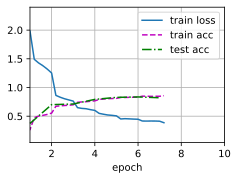

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
with torch.no_grad():
    X = torch.randn(size=(1, 1, 224, 224)).to('cuda')
    net = net.to('cuda')
    result = net(X)
print(result)

In [15]:
total_parameters = sum([p.numel() for p in net.parameters()])
print(total_parameters)

1769112
